### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd

1. display 5 columns from dataset

In [2]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/chellee18/DataMining/refs/heads/main/Week%203/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()

#conclusion
# Ada 10 kolom
# Tidak ada nilai yang hilang di semua kolom kecuali kolom race dan admision 
# Ada 4 tipe data bool(1), float64(3), int64(1), object(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)
print("admission")
print(admission_counts)

admission
NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64


In [5]:
#3b
# Fill NaN values in the 'race' column with "other"
df['race'] = df['race'].fillna('other')

print("race")
print(df['race'].value_counts(dropna=False))

race
other       1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

5. recheck missing value

In [7]:
#5
df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [8]:
# 6
df_cleaned = df.drop(columns=['application_id'])

df_cleaned.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,deny
2,Female,True,3.30,Business,other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,deny


7. show describe column and conclude what the insight is from that column

In [9]:
#7
describe_columns = df[['gpa', 'gmat', 'work_exp']].describe()
describe_columns


#conclusion
# berdasarkan hasil dapat dilihat jumlah data sebanyak 6194 untuk setiap kolom
# GPA rata-rata adalah 3.250, GMAT adalah 651.09, work_exp adalah 5.0169. , 
# standart deviasi dari GPA adalah 0.5, GMAT adalah 49.294 dan work_exp adalah 1.0324
# untuk nilai terendah GPA adalah 2.65, GMAT adalah 570.0 , work_exp adalah 1.0
# 25% GPA dibawah 3.105, GMAT dibawah 610.0, work_exp dibawah 4.0
# 50% GPA dari data memiliki GPA di atas 3.25, dan setengah lainnya di bawah 3.25, GMAT GMAT adalah 650.0, work_exp 5.0
# 75% GPA di atas 3.350,  GMAT di atas 680.0, work_exp 6.0
# max GPA tertinggi adalah 3.770, GMAT tertinggi 780.0, dan work_exp 9.0

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

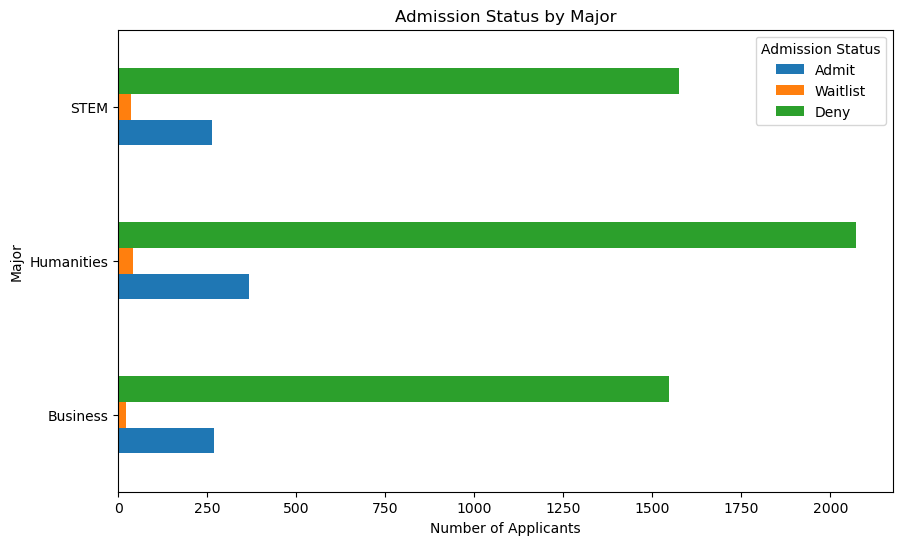

In [10]:
#8
import matplotlib.pyplot as plt

# Group data by major and admission status, then count the occurrences
count_admission_by_major = df.groupby(['major','admission'])['admission'].count().unstack()

# Create a horizontal bar chart
count_admission_by_major.plot (kind='barh', figsize=(10,6))

# Customize the chart
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')

# Step 4: Display the legend
plt.legend(title='Admission Status', labels=['Admit', 'Waitlist', 'Deny'])

# Show the chart
plt.show()

# Dari hasil gambar terlihat bahwa mahasiswa jurusan Humanities paling banyak ditolak, 
# tetapi juga banyak yang masuk waiting list dibanding jurusan lain. 
# Selain itu, mahasiswa Humanities juga banyak yang diterima. 
# Mahasiswa STEM dan Business sama-sama banyak yang ditolak dan masuk waiting list, 
# namun mahasiswa STEM lebih banyak di waiting list dibanding Business, meski tidak sebanyak Humanities.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

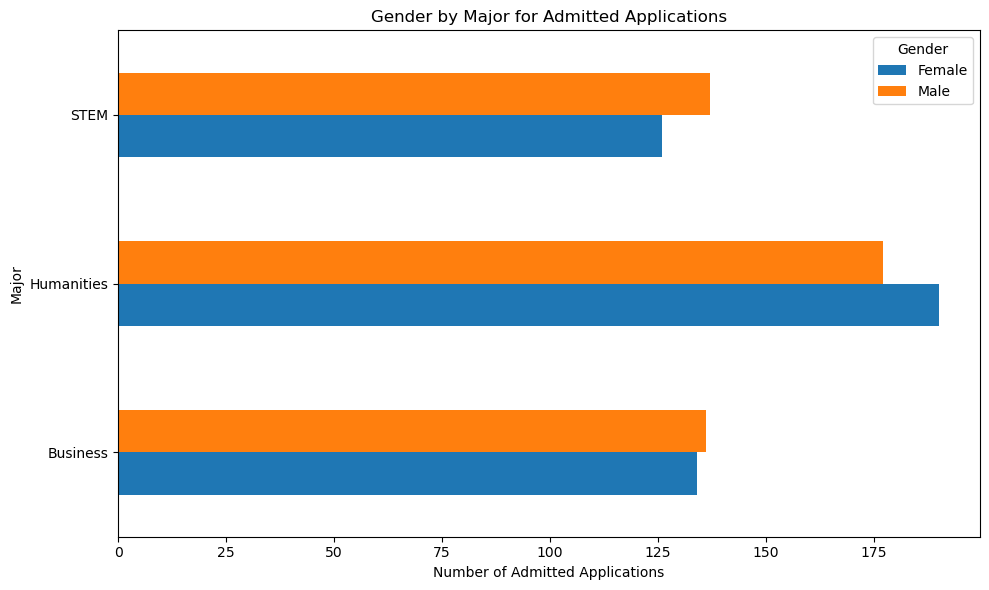

In [11]:
#9

admitted_df = df[df['admission'] == 'Admit']
count_admitted_gender_by_major = admitted_df.groupby(['major', 'gender'])['gender'].count().unstack()
count_admitted_gender_by_major.plot(kind='barh', figsize=(10, 6))
plt.title('Gender by Major for Admitted Applications')
plt.xlabel('Number of Admitted Applications')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#Dari data gender, terlihat bahwa di bidang Humanities, lebih dari 175 mahasiswi diterima dibandingkan mahasiswa pria. 
#Di bidang STEM dan Business, lebih banyak pria yang diterima dibandingkan perempuan. 
#Mahasiswa STEM juga lebih banyak masuk waiting list dibandingkan Business, namun masih kurang dari Humanities.


10. create your own insightful visualization and explain it in at least 2 sentences

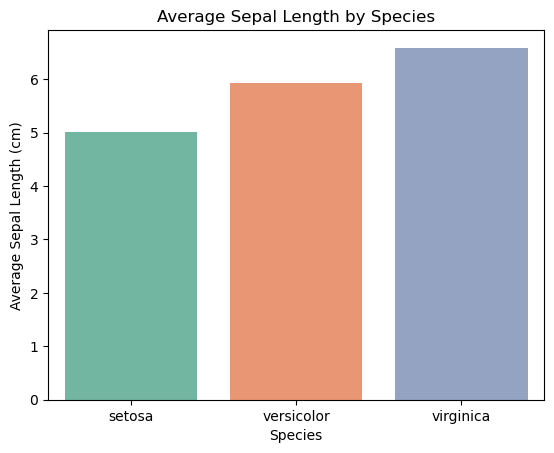

In [12]:
#10
from sklearn.datasets import load_iris
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Group by species and calculate the mean sepal length
sepal_length_mean = iris_df.groupby('species')['sepal length (cm)'].mean().reset_index()

# Create a bar plot
sns.barplot(x='species', y='sepal length (cm)', data=sepal_length_mean, palette='Set2')

# Set plot labels and title
plt.title("Average Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Average Sepal Length (cm)")

# Show the plot
plt.show()

#Diagram batang ini menunjukkan panjang sepal rata-rata untuk setiap spesies Iris, dengan *Iris-virginica* yang tertinggi, 
#Diikuti oleh *Iris-versicolor* dan *Iris-setosa*. Plot batang
#secara efektif menyoroti perbedaan antar kategori, sehingga mudah untuk membandingkan fitur antar spesies.

11. create your own insightful visualization and explain it in at least 2 sentences

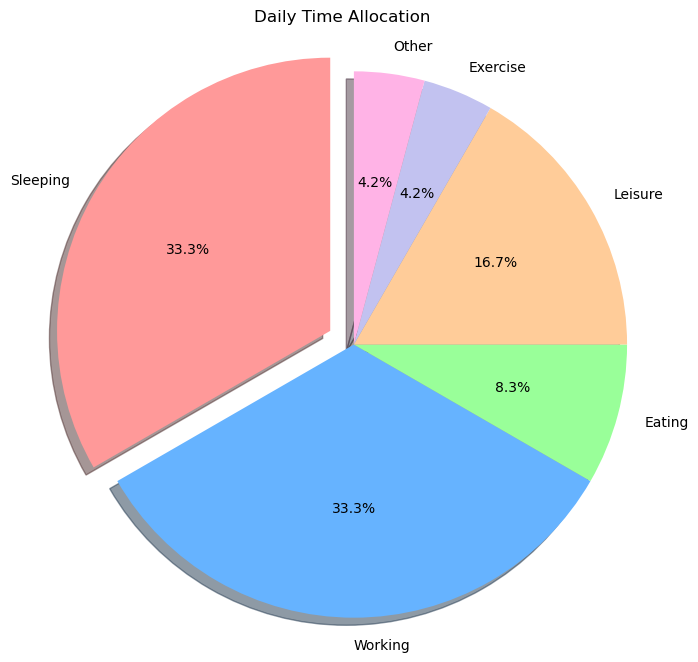

In [13]:


# Data to plot
labels = ['Sleeping', 'Working', 'Eating', 'Leisure', 'Exercise', 'Other']
sizes = [8, 8, 2, 4, 1, 1]  # Hours spent on each activity
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0.1, 0, 0, 0, 0, 0)  # explode the 1st slice (Sleeping)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Daily Time Allocation')
plt.show()

#Diagram lingkaran ini menggambarkan bagaimana waktu dialokasikan untuk berbagai aktivitas harian, 
#dengan tidur dan bekerja mengambil porsi terbesar, masing-masing 33%. 
#Visualisasi seperti ini dapat mendorong individu untuk menilai apakah distribusi waktu mereka selaras dengan tujuan mereka, 
#seperti menambah waktu luang atau mendedikasikan lebih banyak waktu untuk berolahraga.

12. encode categorical columns and display the results

In [14]:
#12
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['gender', 'major', 'race', 'work_industry']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Convert 'international' to binary (True -> 1, False -> 0)
df['international'] = df['international'].astype(int)

# Display the result
df_encoded = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]
df_encoded.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [15]:
# Encode the admission column
le_admission = LabelEncoder()
#encode y
df['admission'] = le_admission.fit_transform(df['admission'])

df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,0,3.30,0,0,620.0,3.0,3,0
1,2,1,0,3.28,1,1,680.0,5.0,6,2
2,3,0,1,3.30,0,5,710.0,5.0,13,0
3,4,1,0,3.47,2,1,690.0,6.0,13,2
4,5,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

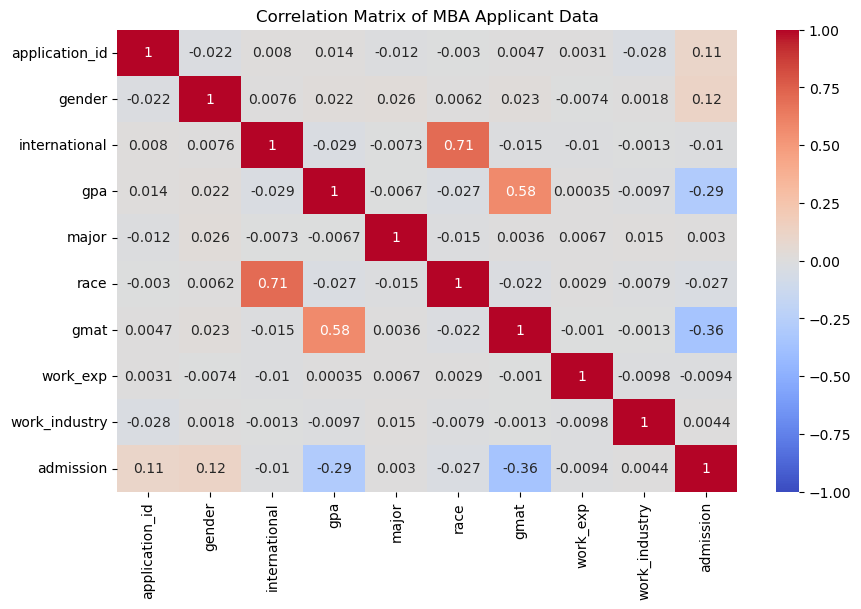

In [16]:
#13

# Calculate correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()

#Conclusion
#GPA dan GMAT memiliki korelasi positif yang cukup tinggi sebesar 0.58. Ini menunjukkan bahwa pelamar dengan nilai GMAT yang lebih tinggi cenderung memiliki nilai GPA yang lebih tinggi juga.
# GPA memiliki korelasi negatif yang cukup kuat dengan variabel admission sebesar -0.29. Ini mengindikasikan bahwa ada kemungkinan pelamar dengan GPA yang lebih rendah lebih sering diterima dibandingkan yang memiliki GPA lebih tinggi.
# GMAT dan Admission juga memiliki korelasi negatif yang moderat sebesar -0.36, yang menunjukkan bahwa pelamar dengan skor GMAT yang lebih rendah cenderung lebih sering diterima.
# Race dan International memiliki korelasi yang cukup tinggi sebesar 0.71, yang menunjukkan bahwa ada hubungan kuat antara status internasional dengan ras tertentu 
# (misalnya, pelamar dari latar belakang internasional mungkin lebih sering berasal dari ras tertentu).
# Korelasi variabel lain, seperti gender, major, dan work_exp, relatif sangat rendah (di bawah 0.1), yang berarti mereka tidak menunjukkan hubungan kuat dengan variabel lain dalam dataset ini.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']
label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

dtree = RandomForestClassifier(n_estimators=200, random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Lisa_data = {
    'gender': 0, 'international': 1, 'gpa' : df['gpa'].mean(), 'major': 0, 'race' : 0, 'gmat' : 580, 'work_exp' : 2, 'work_industry': 3
}
df_lisa = pd.DataFrame([Lisa_data])
predict = dtree.predict(df_lisa)
print("Predicted admission status (encoded): {}".format(predict))

admission = encoder.inverse_transform(predict)

print("The admission status of Lisa is:", admission[0])

Accuracy: 0.8321226795803067
Predicted admission status (encoded): [2]


NameError: name 'encoder' is not defined

In [35]:
# Assume df is the DataFrame containing your dataset

# 1. Prepare Lisa's data
lisa_data = {
    'gender': 0,  # Assuming 0 for Female
    'international': 0,  # Assuming 0 for local student
    'gpa': df['gpa'].mean(),  # Average GPA
    'major': 0,  # Assuming 0 for Entrepreneurship (after encoding)
    'race': 2,  # Assuming 2 for Asian (after encoding)
    'gmat': 580,  # Lisa's GMAT score
    'work_exp': 2,  # Work experience from 2018 to 2020 (2 years)
    'work_industry': 1  # Assuming 1 for Finance (after encoding)
}

# 2. Create a DataFrame from Lisa's data
lisa_df = pd.DataFrame([lisa_data])

# 3. Encode categorical features for Lisa's data
lisa_df_encoded = pd.get_dummies(lisa_df, columns=['major', 'race', 'work_industry'], drop_first=True)

# Ensure the encoded DataFrame aligns with the model's expected input shape
lisa_df_encoded = lisa_df_encoded.reindex(columns=X.columns, fill_value=0)

# 4. Make a prediction using the trained model
# Assume dt_classifier is the Decision Tree model that has been trained
work_industry_prediction = dt_classifier.predict(lisa_df_encoded)

# 5. Decode the prediction back to the original label
# Assuming 0 = Other, 1 = Finance, 2 = Consulting, etc.
industry_labels = {0: "Other", 1: "Finance", 2: "Consulting", 3: "Technology"}
predicted_industry = industry_labels.get(work_industry_prediction[0], "Unknown")

# Final output
print(f'Prediction for Lisa\'s work industry: {predicted_industry}')



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- application_id
